In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import requests as rq

In [2]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/Ames_Housing_Data1.tsv'
res=rq.get(url)
with open('Ames_Housing_Data1.tsv','wb') as f:
    f.write(res.content)

In [3]:
df=pd.read_csv('Ames_Housing_Data1.tsv',sep='\t')
df.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000


In [4]:
df['SalePrice'].describe()

count      2931.000000
mean     180807.729785
std       79875.557267
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [5]:
hous_num = df.select_dtypes(include = ['float64', 'int64'])
hous_num_corr = hous_num.corr()['SalePrice'] # -1 means that the latest row is SalePrice
top_features = hous_num_corr[abs(hous_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(top_features), top_features))

There is 12 strongly correlated values with SalePrice:
SalePrice         1.000000
Overall Qual      0.799226
Gr Liv Area       0.706791
Garage Cars       0.647891
Garage Area       0.640411
Total Bsmt SF     0.632270
1st Flr SF        0.621672
Year Built        0.558340
Full Bath         0.545339
Year Remod/Add    0.532664
Garage Yr Blt     0.526808
Mas Vnr Area      0.508277
Name: SalePrice, dtype: float64


In [13]:
dup=df[df.duplicated('PID')]
drop=df.drop_duplicates

In [14]:
df.index.is_unique

True

In [18]:
total=df.isnull().sum().sort_values(ascending=False)
total

Pool QC         2918
Misc Feature    2825
Alley           2733
Fence           2359
Mas Vnr Type    1775
                ... 
PID                0
Central Air        0
1st Flr SF         0
2nd Flr SF         0
SalePrice          0
Length: 82, dtype: int64

In [20]:
df["Lot Frontage"].isnull().sum()

490

In [22]:
median=df["Lot Frontage"].median
median

<bound method Series.median of 0       141.0
1       141.0
2        80.0
3        81.0
4        93.0
        ...  
2926     37.0
2927      NaN
2928     62.0
2929     77.0
2930     74.0
Name: Lot Frontage, Length: 2931, dtype: float64>

In [23]:
df["Lot Frontage"].fillna(median,inplace=True)

C:\Users\Get Into Pc\AppData\Local\Temp\ipykernel_14016\1740299058.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<bound method Series.median of 0       141.0
1       141.0
2        80.0
3        81.0
4        93.0
        ...  
2926     37.0
2927      NaN
2928     62.0
2929     77.0
2930     74.0
Name: Lot Frontage, Length: 2931, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df["Lot Frontage"].fillna(median,inplace=True)


In [24]:
df["Lot Frontage"].isnull().sum()

0

<Axes: xlabel='Lot Area'>

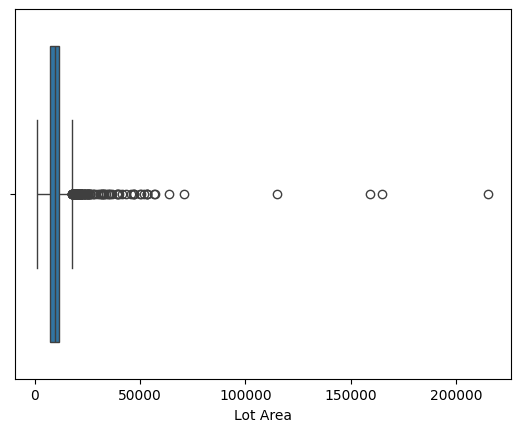

In [26]:
sns.boxplot(x=df['Lot Area'])

<Axes: xlabel='SalePrice'>

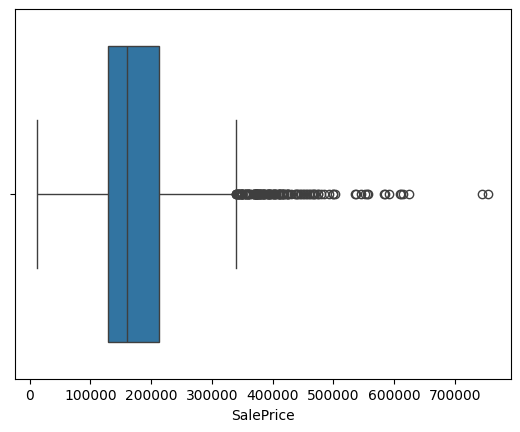

In [28]:
sns.boxplot(x=df['SalePrice'])